# Numerisk derivasjon

```{admonition} Læringsutbytte
Etter å ha arbeidet med denne delen av emnet, skal du kunne:
1. forklare den teoretisk bakgrunnen for numerisk derivasjon, og forskjellen på numerisk og analytisk derivasjon
2. implementere framoverdifferansen, bakoverdifferansen og sentraldifferansen for numerisk derivasjon
3. derivere funksjoner og data
```

## Derivasjonsbegrepet
Derivasjon handler om endring. Den deriverte kan beskrive stigningen og forandringen i et forløp. Nærmere bestemt handler det om momentan endring, altså endringen mellom to tilstander (funksjonsverdier) over en svært liten endring i en annen tilstand: 

$$f'(x) = \frac{df}{dt} = \lim_{\Delta x \rightarrow 0} \frac{f(x+dx) - f(x)}{dx}$$

Vi har derfor nytte av derivasjon i mange tilfeller der vi ønsker å beskrive en utvikling. Vi kan derimot ikke alltid derivere analytisk for hånd, så det er en stor verdi i å beherske numerisk derivasjon. Da kan vi enklest tilnærme den analytisk deriverte med en numerisk derivert:

```{admonition} Numerisk derivasjon (framoverdifferansen)
For en liten verdi av $dx$ kan vi tilnærme den førstederiverte slik:

$$f'(x) = \frac{df}{dx} \approx \frac{f(x+dx) - f(x)}{dx}$$
```
der vi tilnærmer grenseverdien med en svært liten verdi av dx. Her skal vi se på denne metoden og andre metoder som kan brukes til å tilnærme den deriverte numerisk.

```{admonition} Underveisoppgave
:class: tip
Bruk definisjonen ovenfor og regn ut $f'(1)$ for $f(x) = 2x + 2$. Sett $dx = 1\cdot 10^{-8}$.
```

````{admonition} Løsningsforslag
:class: tip, dropdown
```{code-block} Python
def f(x):
    return x**2

dx = 1E-8
x = 1
fder = (f(x + dx) - f(x))/dx

print("f'(1) =", fder)
```
````

Løsningsforslaget ovenfor viser en enkel måte å implementere den numeriske deriverte på. Det kan også være nyttig å kunne lage metoden som en funksjon:

In [9]:
def deriver(f, x, dx = 1E-8):
    dy = f(x + dx) - f(x)
    return dy/dx

Legg merke til at vi ikke deriverer symbolsk. Det betyr at vi ikke får en annen funksjon når vi deriverer en funksjon. Vi får bare _funksjonsverdier_. Vi må altså deriverere i gitte punkter, for eksempel $f'(1)$ eller $f'(-5)$. Dersom vi ønsker å visualisere den deriverte til en funksjon, må vi derfor derivere funksjonen i flere punkter. Dette kan vi gjøre vektorisert ved hjelp av arrayer:

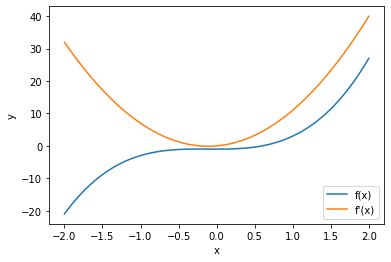

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):# Definerer en funksjon vi skal derivere
    return 3*x**3 + x**2 - 1

x = np.linspace(-2,2,100)
y = f(x)
yder = deriver(f,x)

plt.plot(x,y,label="f(x)") # Plotter funksjonen
plt.plot(x,yder,label="f'(x)") # Plotter den deriverte funksjonen
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Feilanalyse
La oss nå ta en titt på hvilke verdier av $\Delta x$ som gir best resultat. Det må vel være den verdien som ligger nærmest 0, altså en så liten verdi som mulig -- eller? La oss teste dette ved å skrive ut den deriverte for ulike verdier av $\Delta x$:

In [13]:
def f(x):
    return 2*x**2 + x - 5

def fder_analytisk(x):
    return 4*x + 1

x = 1
delta_x = [10**-i for i in range(1,18)] # liste med verdier fra 10^-18 til 10^-1
analytisk = fder_analytisk(x)

for i in range(len(delta_x)):
    numerisk = deriver(f, x, delta_x[i]) 
    feil = abs(numerisk-analytisk)/analytisk * 100
    print("For delta_x =", delta_x[i],"er feilen:", feil, "%")

For delta_x = 0.1 er feilen: 4.000000000000092 %
For delta_x = 0.01 er feilen: 0.40000000000048885 %
For delta_x = 0.001 er feilen: 0.03999999998569592 %
For delta_x = 0.0001 er feilen: 0.003999999920267783 %
For delta_x = 1e-05 er feilen: 0.00040000068821655077 %
For delta_x = 1e-06 er feilen: 3.999977025159751e-05 %
For delta_x = 1e-07 er feilen: 4.010780685348436e-06 %
For delta_x = 1e-08 er feilen: 6.07747097092215e-07 %
For delta_x = 1e-09 er feilen: 8.274037099909037e-06 %
For delta_x = 1e-10 er feilen: 8.274037099909037e-06 %
For delta_x = 1e-11 er feilen: 8.274037099909037e-06 %
For delta_x = 1e-12 er feilen: 0.008890058234101161 %
For delta_x = 1e-13 er feilen: 0.07992778373591136 %
For delta_x = 1e-14 er feilen: 0.524016993585974 %
For delta_x = 1e-15 er feilen: 6.581410364015028 %
For delta_x = 1e-16 er feilen: 100.0 %
For delta_x = 1e-17 er feilen: 100.0 %


Vi ser at "store" verdier som 0.1 og 0.01 gir en del feil. Men vi ser også faktisk at nøyaktigheten er størst ved $dx = 10^{-8}$, og at den synker både med økende og med minkende $dx$. Og attpåtil gir $dx \leq 10^{-16}$ null som svar! Dette gir naturlig nok en feil på 100 \%, siden den analytiske verdien er 5.

Vi forventer kanskje ikke dette resultatet. Dersom vi kun ser på definisjonen av den deriverte, er det ikke spesielt logisk at det skal slå slik ut. Men det hele handler om at tall ikke er representert eksakt i en datamaskin, og når datamaskinen skal operere med svært små tall, kan det bli en liten avrundingsfeil når den regner med tallene. Denne avrundingsfeilen gjør at vi får feil dersom vi velger for små verdier av $dx$. Dersom vi gjør en mer generell feilanalyse, viser det seg at $10^{-8}$ er en god verdi å velge her. 

````{admonition} Underveisoppgave
:class: tip
Lag et plott med feilen som funksjon av _dx_ med utgangspunkt i programmet ovenfor. Bruk logaritmiske akser – dette får resultatene tydeligere fram. Du kan lage logaritmiske akser slik:
```{code-block} Python
plt.yscale('log')
plt.xscale('log')
```
````

````{admonition} Løsningsforslag
:class: tip, dropdown
```{code-block} Python
import matplotlib.pyplot as plt

def f(x):
    return 2*x**2 + x - 5

def fder_analytisk(x):
    return 4*x + 1

x = 1
delta_x = [10**-i for i in range(1,18)] # liste med verdier fra 10^-18 til 10^-1
analytisk = fder_analytisk(x)
avvik = []

for i in range(len(delta_x)):
    numerisk = deriver(f, x, delta_x[i]) 
    feil = abs(numerisk-analytisk)/analytisk * 100
    avvik.append(feil)
    print("For delta_x =", delta_x[i], "er feilen:", feil, "%")

plt.plot(delta_x, avvik)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('dx')
plt.ylabel('Feil (%)')
plt.show()
```
````

## Andre tilnærminger

Tilnærmingen til den deriverte som vi har sett på, tar utgangspunkt i punktene $(x, f(x))$ og $(x+dx, f(x+dx))$ for å regne ut den momentane vekstfarten (altså den deriverte) i punktet $x$. Men vi kan like godt bruke andre punkter. Metoden vi har sett på, kalles _framoverdifferansen_ fordi den tar utgangspunkt i punktet $x$ og _neste_ punkt $x + dx$. Tilsvarende kan vi ta utgangspunkt i punktet $x$ og _forrige_ punkt $x - dx$. Dette kaller vi _bakoverdifferansen_. Bakoverdifferansen gir samme feil som framoverdifferansen, men er teoretisk nyttig for å utlede andre metoder.

```{admonition} Numerisk derivasjon (bakoverdifferansen)
For en liten verdi av $dx$ kan vi tilnærme den førstederiverte slik:

$$\frac{df}{dx} \approx \frac{f(x) - f(x-dx)}{dx}$$
```

En metode som derimot gir mindre feil enn både framover- og bakoverdifferansen, er _sentraldifferansen_. Det er en slags kombinasjon av framover- og bakoverdifferansen, der vi tar utgangspunkt i gjennomsnittet (midtpunktet) av $x+dx$ og $x-dx$.

```{admonition} Numerisk derivasjon (sentraldifferansen)
For en liten verdi av $dx$ kan vi tilnærme den førstederiverte slik:

$$\frac{df}{dx} \approx \frac{f(x+dx) - f(x-dx)}{2\cdot dx}$$
```

<img src="https://github.com/andreasdh/programmering-i-kjemi/blob/master/docs/bilder/numerisk_derivasjon.png?raw=true" width="500"/>

```{admonition} Underveisoppgave
:class: tip
Implementer bakover- og sentraldifferansen som Python-funksjoner. Gjør en feilanalyse med de tre ulike tilnærmingene for ulike verdier av $\Delta x$. Bruk funksjonen $f(x) = \sin{(x)}$ og sammenlikn med den analytiske verdien av den deriverte, $f'(x) = \cos{(x)}$
```

## Numerisk derivasjon av data
Nå kommer vi til den nyttigste delen av numerisk derivasjon, nemlig derivasjon av diskrete data. Vi kan derivere på samme måte som vi gjorde med kontinuerlige funksjoner, men vi har gitt en $dx$ som er gitt av avstanden mellom datapunktene våre. Hvis målefrekvensen er lav, blir $dx$ høy, og motsatt. La oss se på hvordan vi kan derivere noen posisjonsdata:

In [18]:
import pandas as pd

# Leser og sjekker ut dataene
data = pd.read_csv("https://raw.githubusercontent.com/andreasdh/NAT3000/master/docs/datafiler/posisjon.txt")
data.head()

,tid_s,posisjon_m
0,0.00000,0.000000
1,0.01001,0.000060
2,0.02002,0.000240
3,0.03003,0.000541
4,0.04004,0.000962


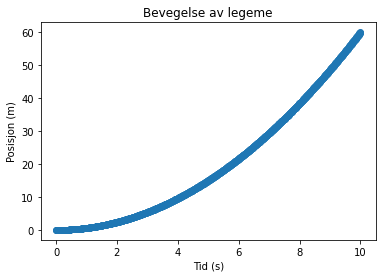

In [19]:
# Plotter dataene
import matplotlib.pyplot as plt

x = data["tid_s"]
y = data["posisjon_m"]

plt.scatter(x, y)
plt.title("Bevegelse av legeme")
plt.xlabel("Tid (s)")
plt.ylabel("Posisjon (m)")
plt.show()

Husk at $v(t) = s'(t)$. Hvis vi deriverer, får vi altså farten til legemet:

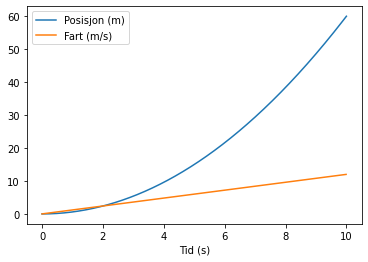

In [21]:
dydx = []
for i in range(len(y)-1):
    dy = y[i+1]-y[i]
    dx = x[i+1]-x[i]
    der = dy/dx
    dydx.append(der)

dydx.append(None)
plt.plot(x, y, label='Posisjon (m)')
plt.plot(x, dydx, label='Fart (m/s)')
plt.xlabel('Tid (s)')
plt.legend()
plt.show()

I løkka bruker vi samme framgangsmåte som vi gjorde da vi deriverte funksjoner, men nå tar vi verdiene fra ei liste med verdier. Vi kan kun kjøre løkka til lengden av lengden av listene minus 1, fordi vi skal ta forskjellen mellom verdier. Da blir det nemlig én verdi mindre enn i _y_- og _x_-listene. Derfor legger vi til en ekstra verdi "None" til slutt i lista, slik at alle listene blir like lange.

Som du ser, kan vi benytte numerisk derivasjon på både kontinuerlige funksjoner og diskrete data. Hovedpoenget er at vi finner ut noe om endringen i en funksjon eller i et datasett. Og desto mindre _dx_ er, desto bedre tilnærming er denne endringen til den momentante endringen i et punkt, altså den deriverte.

```{admonition} Didaktisk oppgave
1. Kan programmering og numeriske metoder være en måte å forstå derivasjon på? I så fall hvordan?
2. I denne delen har du sett på enkel numerisk derivasjon, feilanalyse, ulike tilnærminger til den deriverte og derivasjon av diskrete data. Hvilke deler av dette egner seg for elever, og i hvilke(n) sammenheng(er)?
```

## Oppgaver

```{admonition} Oppgave 1
:class: tip
Beregn f'(1) numerisk for følgende funksjoner. Kontroller ved å derivere for hånd.

1. $f(x) = x^2 - 4x + 5$
2. $f(x) = e^x$
3. $f(x) = \sqrt{\ln(x)}$
```

````{admonition} Oppgave 2
:class: tip
Skriv om funksjonen _deriver_ slik at _dx_ har en standardverdi. Velg en standardverdi som sannsynligvis vil gi gode resultater.  
```{code-block} Python
def deriver(f, x, dx = 1E-8):
    dy = f(x + dx) - f(x)
    return dy/dx
```
````

```{admonition} Oppgave 3
:class: tip
En partikkel følger posisjonsfunksjonen $x(t) = t^3 + \frac{1}{3}\cdot t$. Plott både posisjon, hastighet og akselerasjon for $t = [0,10]$. Husk at $v(t) = s'(t)$ og $a(t) = v'(t)$.
```

```{admonition} Oppgave 4
:class: tip
Forklar hva som er forskjellen mellom analytisk og numerisk derivasjon.
```

```{admonition} Oppgave 5
:class: tip
Temperaturen $T(t)$ (i celsius) etter $t$ minutter til en nylig lagd te følger denne modellen, som vi har kommet fram til ved regresjon av eksperimentelle data:

$$T(t) = 70e^{-0.065t}$$

a) Bruk Newtons kvotient for å tilnærme den deriverte til $T(t)$ for 1000 jevnt fordelte verdier av $t$ i intervallet $[0, 60]$
b) Plott resultatet fra a) sammen med grafen for $T(t)$. Bruk merkelapper (labels og legend) for grafene.
c) Hvor mye synker temperaturen med ved element nr. 42 i lista over verdier for $t$ (vi teller med 0-te element)?
```

````{admonition} Oppgave 6
:class: tip
Programmet nedenfor leser av fila "heistur_kjemi_fysikk.txt" og finner fart og akselerasjon ved hjelp av numerisk derivasjon. Programmet fungerer derimot ikke helt som det skal. Rett opp feilen. Lag også en ny kolonne "fart" og en ny kolonne "akselerasjon" i dataframen.


<iframe src="https://trinket.io/embed/python3/0ead204f00" width="100%" height="450" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>
````

````{admonition} Løsningsforslag
:class: tip, dropdown
```{code-block} Python

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("heistur_kjemi_fysikk.txt")
p = data["height_m"]
t = data["time_s"]
v = [] # fart i m/s
a = [] # akselerasjon i m/s^2

# Vi trenger to løkker fordi a tar utgangspunkt i v, som derfor må lages først
for i in range(len(p)-1):
  dt = t[i+1] - t[i]
  fart = (p[i+1] - p[i])/dt
  v.append(fart)

for i in range(len(v)-1):
  dt = t[i+1] - t[i]
  akselerasjon = (v[i+1] - v[i])/dt
  a.append(akselerasjon)

v.append(None)
a.append(None)
a.append(None)

# Legger til verdiene i dataframen
data["fart"] = v
data["akselerasjon"] = a

plt.subplot(3,1,1)
plt.ylabel("Posisjon (m)")
plt.plot(t, p, color = "limegreen")
plt.subplot(3,1,2)
plt.ylabel("Fart (m)")
plt.ylim(-1,1)
plt.plot(t, v, color = "navy")
plt.subplot(3,1,3)
plt.ylabel("Akselerasjon (m)")
plt.plot(t, a, color = "firebrick")
plt.ylim(-1,1)
plt.xlabel("Tid (s)")
plt.tight_layout()
plt.show()
```
````

```{admonition} Oppgave 7
:class: tip
Løs puslespillet nedenfor, som skal illustrere derivasjon av diskrete data.
```

In [2]:
from IPython.display import IFrame
IFrame('https://parsons.herokuapp.com/puzzle/cd36da48d9cc4fcbbaf13103d84454bf', width=1000, height=750)

## Video

```{tabbed} Numerisk derivasjon
<iframe width="890" height="500" src="https://www.youtube.com/embed/SDZTPkbZCi4? autoplay=0&rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```